In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, interpolate, optimize

itam = (19.344443, -99.200117)
samplesize = 150
exporting = False

sns.set()

### Experimento con el metro: 
Dados puntos geográficos "disponibles", buscamos el óptimo con base en diferentes objetivos: 
- Distancia a estaciones del metro 
- Precios

Primer objetivo: 
Minimizar distancia. Primero, un estudio

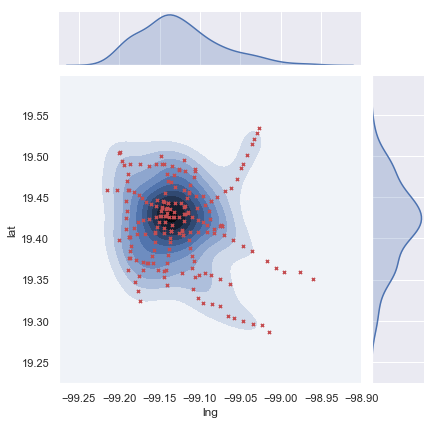

In [52]:
t_publico = pd.read_csv("CDMX-info/estaciones-metro.csv", delimiter=";")
t_publico.rename(columns={"stop_lat":"lat", "stop_lon":"lng"}, inplace=True)

p = sns.jointplot(x="lng", y="lat", data=t_publico, kind="kde")
p.plot_joint(plt.scatter, c="r", s=10, marker="x")

if exporting: 
    p.savefig("distplo_metro.eps", format="eps" )

In [56]:
# Creamos la función de kde gaussiana
# gaussian_kde recibe arreglos de (n x m) donde n es la cantidad de variables de la distribución
train_data = np.vstack([t_publico.lng, t_publico.lat])
kde_func = stats.gaussian_kde(train_data)

In [57]:
def c_test2(x, y): 
    X = x.ravel()
    Y = y.ravel()
    positions = np.vstack([X, Y])
    return - np.reshape(kde_func(positions).T, x.shape) + 80

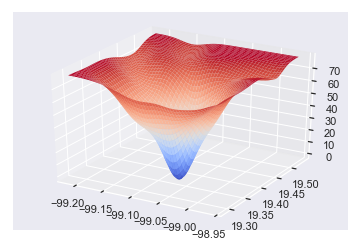

In [66]:
tx = np.linspace(t_publico.lng.min(), t_publico.lng.max(), samplesize)
ty = np.linspace(t_publico.lat.min(), t_publico.lat.max(), samplesize)
XX, YY = np.meshgrid(tx, ty)

ZZ = c_test2(XX.T, YY.T)

fig, ax = plt.subplots()
ax = plt.axes(projection="3d")
ax.plot_surface(XX, YY, ZZ, cmap='coolwarm', edgecolor='none' )

if exporting: 
    fig.savefig("func2_metro.eps", format="eps" )

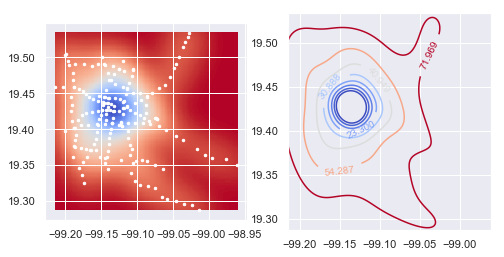

In [69]:
fig, [ax, ax2] = plt.subplots(1,2, figsize=(8,4))
ax.imshow(np.rot90(ZZ), cmap="coolwarm",
          extent=[t_publico.lng.min(), t_publico.lng.max(), t_publico.lat.min(), t_publico.lat.max()])
ax.scatter(t_publico.lng, t_publico.lat, s=6, c="w")

cont = ax2.contour(XX, YY, ZZ.T, np.logspace(1,7), cmap="coolwarm")
ax.clabel(cont)

if exporting: 
    fig.savefig("dist_func2_metro.eps", format="eps" )

Ahora, tratamos de restarle importancia a estar cerca del centroide que se forma como consecuencia de la alta concentración de estaciones en un punto

In [9]:
# Creamos la función de kde gaussiana
# gaussian_kde recibe arreglos de (n x m) donde n es la cantidad de variables de la distribución
train_data = np.vstack([t_publico.lng, t_publico.lat])
kde_func = stats.gaussian_kde(train_data)

def c_test3(x, y): 
    X = x.ravel()
    Y = y.ravel()
    positions = np.vstack([X, Y])
    res =  np.reshape(kde_func(positions).T, x.shape)
    return - ( np.log(res) / np.log(1.1) ) + 50


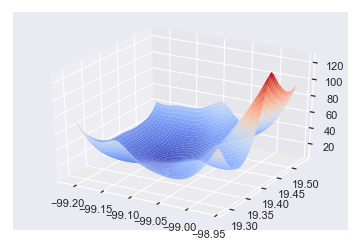

In [29]:
tx = np.linspace(t_publico.lng.min(), t_publico.lng.max(), samplesize)
ty = np.linspace(t_publico.lat.min(), t_publico.lat.max(), samplesize)
XX, YY = np.meshgrid(tx, ty)

# Nota: Quién sabe por qué hay que transponer XX y YY. Solo es asi. 
ZZ = c_test3(XX.T, YY.T)

fig, ax = plt.subplots()
ax = plt.axes(projection="3d")
ax.plot_surface(XX, YY, ZZ.T, cmap='coolwarm', edgecolor='none' )

if exporting: 
    fig.savefig("figs/func3_metro.eps", format="eps" )

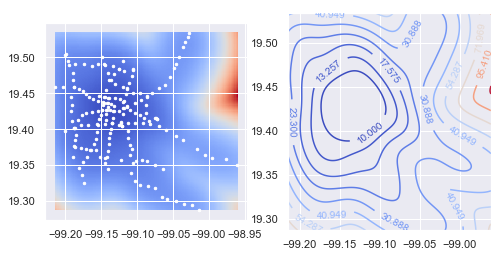

In [33]:
fig, [ax, ax2] = plt.subplots(1,2, figsize=(8,4))
ax.imshow(np.rot90(ZZ), cmap="coolwarm",
          extent=[t_publico.lng.min(), t_publico.lng.max(), t_publico.lat.min(), t_publico.lat.max()])
ax.scatter(t_publico.lng, t_publico.lat, c="w", s=6)

cont = ax2.contour(XX, YY, ZZ.T, np.logspace(1,7), cmap="coolwarm")
ax2.clabel(cont)

if exporting: 
    fig.savefig("figs/dist_func3_metro.eps", format="eps" )

La función no es perfecta (quizán una métrica de conexidad basado en distancia a lineas de metro sea mejor)

In [12]:
C_metro = c_test3

### Metrobus
Repetimos exactamento lo mismo que se hizo con el metro

In [13]:
metrobus = pd.read_csv("CDMX-info/estaciones-metrobus.csv", delimiter=";")
metrobus.rename(columns={"Latitud": "lat", "Longitud": "lng"}, inplace=True)

Estudio rápido 

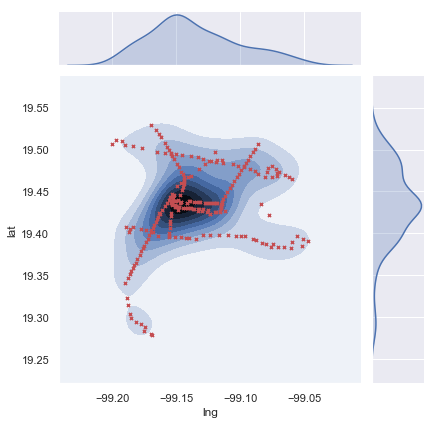

In [34]:
pp = sns.jointplot(x="lng", y="lat", data=metrobus, kind="kde")
pp.plot_joint(plt.scatter, c="r", s=10, marker="x")

if exporting: 
    pp.savefig("figs/distplo_metrobus.eps", format="eps" )

Creando la función de densidad de probabilidad para el metrobus

In [71]:
mbus_traindata = np.vstack([metrobus.lng, metrobus.lat])
mbus_kde = stats.gaussian_kde(mbus_traindata)

def mb_test(x, y): 
    X = x.ravel()
    Y = y.ravel()
    positions = np.vstack([X,Y])
    res = np.reshape(mbus_kde(positions), x.shape )
    
    return - res + 140

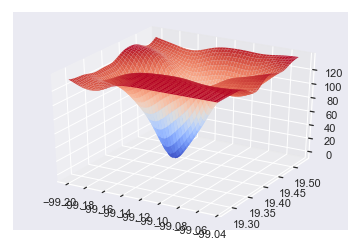

In [72]:
mx = np.linspace(metrobus.lng.min(), metrobus.lng.max(), samplesize)
my = np.linspace(metrobus.lat.min(), metrobus.lat.max(), samplesize)

xX, yY = np.meshgrid(mx, my)

#Evaluando la función
zZ = mb_test(xX.T, yY.T)

fig, ax = plt.subplots()
ax = plt.axes(projection="3d")
ax.plot_surface(xX, yY, zZ.T, cmap="coolwarm", edgecolor="none")

if exporting: 
    fig.savefig("func1_metrobus.eps", format="eps" )

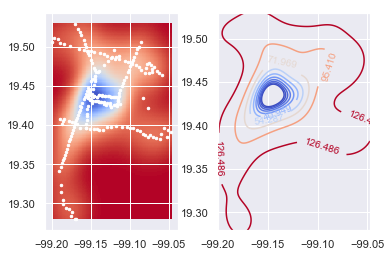

In [73]:
fig, [ax, ax2] = plt.subplots(1,2)
ax.imshow(np.rot90(zZ), cmap="coolwarm", 
         extent=[metrobus.lng.min(), metrobus.lng.max(), metrobus.lat.min(), metrobus.lat.max()])
ax.scatter(metrobus.lng, metrobus.lat,c="w", s=6)

cont = ax2.contour(xX, yY, zZ.T, np.logspace(1,7), cmap="coolwarm")
ax2.clabel(cont)

if exporting: 
    fig.savefig("dist_func1_metrobus.eps", format="eps" )

De nuevo, ajustamos para no penalizar tanto a los puntos alejados del centroide

In [18]:
mbus_traindata = np.vstack([metrobus.lng, metrobus.lat])
mbus_kde = stats.gaussian_kde(mbus_traindata)

def mb_test(x, y): 
    X = x.ravel()
    Y = y.ravel()
    positions = np.vstack([X,Y])
    res = np.reshape(mbus_kde(positions).T, x.shape )
    
    return - (np.log(res) / np.log(1.2)) + 30

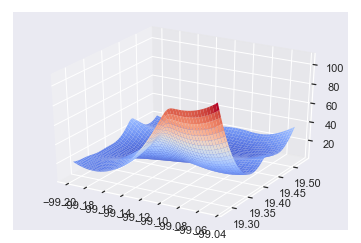

In [51]:
mx = np.linspace(metrobus.lng.min(), metrobus.lng.max(), samplesize)
my = np.linspace(metrobus.lat.min(), metrobus.lat.max(), samplesize)

xX, yY = np.meshgrid(mx, my)

#Evaluando la función
zZ = mb_test(xX.T, yY.T)

fig, ax = plt.subplots()
ax = plt.axes(projection="3d")
ax.plot_surface(xX, yY, zZ.T, cmap="coolwarm", edgecolor="none")

if exporting: 
    fig.savefig("func2_metrobus.eps", format="eps" )

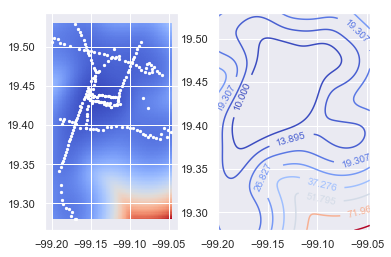

In [20]:
fig, [ax, ax2] = plt.subplots(1,2)
ax.imshow(np.rot90(zZ), cmap="coolwarm", 
         extent=[metrobus.lng.min(), metrobus.lng.max(), metrobus.lat.min(), metrobus.lat.max()])
ax.scatter(metrobus.lng, metrobus.lat, s=5, c="w")

cont = ax2.contour(xX, yY, zZ.T, np.logspace(1, 8), cmap="coolwarm")
ax2.clabel(cont, inline=1)

if exporting: 
    fig.savefig("dist_func2_metrobus.eps", format="eps" )

De nuevo, la función no es perfecta, pero se asienta como la función de costos asociada al metrobus

In [21]:
C_metrobus = mb_test

Ahora visualizamos ambas funciones en acción 
$$ C_{\text{transporte}} = C_{\text{M}} + C_{\text{Mb}} $$

In [22]:
def C_transporte(X, Y): 
    return C_metro(X, Y) + C_metrobus(X, Y)

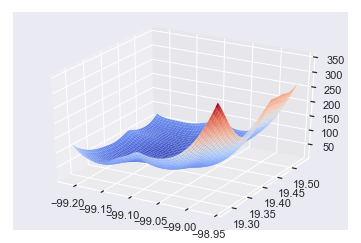

In [44]:
min_lng = min(t_publico.lng.min(), metrobus.lng.min())
min_lat = min(t_publico.lat.min(), metrobus.lat.min())
max_lng = max(t_publico.lng.max(), metrobus.lng.max())
max_lat =  max(t_publico.lat.max(), metrobus.lat.max())
ax = np.linspace(min_lng, max_lng, samplesize)
ay = np.linspace(min_lat, max_lat, samplesize)

aX, aY = np.meshgrid(ax, ay)

aZ = C_transporte(aX.T, aY.T)

fig, ax = plt.subplots()
ax = plt.axes(projection="3d")
ax.plot_surface(aX, aY, aZ.T, cmap="coolwarm", edgecolor="none")

if exporting: 
    fig.savefig("func_transporte.eps", format="eps" )

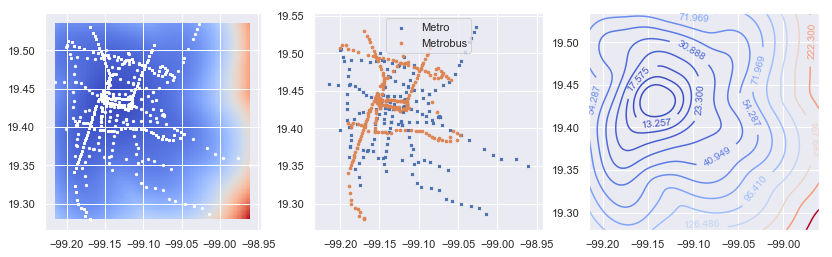

In [45]:
fig, [ax, ax2, ax3] = plt.subplots(1,3, figsize=(14,4))
ax.imshow(np.rot90(aZ), cmap="coolwarm", extent=[min_lng, max_lng, min_lat, max_lat])
ax.scatter(t_publico.lng, t_publico.lat, s=5, c="w")
ax.scatter(metrobus.lng, metrobus.lat, s=5, c="w", marker="s")

ax2.scatter(t_publico.lng, t_publico.lat, s=7, marker="x", label="Metro")
ax2.scatter(metrobus.lng, metrobus.lat, s=7, label="Metrobus")
ax2.legend()

cont = ax3.contour(aX, aY, aZ.T, np.logspace(1,7), cmap="coolwarm")
ax3.clabel(cont)

if exporting: 
    fig.savefig("dist_func_transporte.eps", format="eps" )

Segundo objetivo: Densidad poblacional